# Some work with galpy to see if we can plot the terminal velocity

In [8]:
import galpy.potential
import numpy as np
import pylab
import math
%matplotlib inline

from galpy.potential import MWPotential2014
from galpy.potential import evaluatePotentials as evalPot
from galpy.orbit import Orbit

from optparse import OptionParser


After some initial setup let's play with some potentials.
First: MW potential

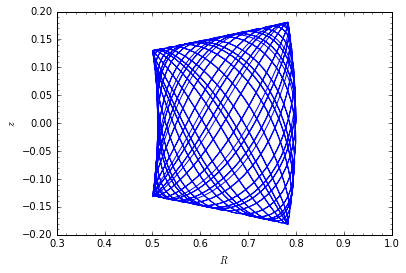

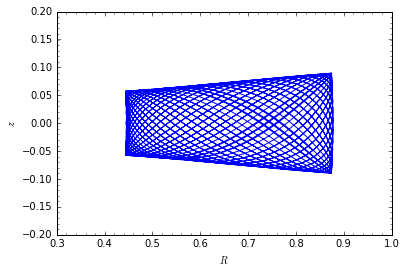

In [9]:

#from galpy.potential import MiyamotoNagaiPotential
#mp= MiyamotoNagaiPotential(a=0.5,b=0.0375,normalize=1.)

#from galpy.potential import MWPotential2014
#print MWPotential2014
#l_deg = np.arange(0.,90.)
#galpy.potential.vterm(MWPotential2014,l_deg)
E, Lz= -1.25, 0.6
o1= Orbit([0.8,0.,Lz/0.8,0.,np.sqrt(2.*(E-evalPot(MWPotential2014,0.8,0.)-(Lz/0.8)**2./2.)),0.])
ts= np.linspace(0.,100.,2001)
o1.integrate(ts,MWPotential2014)
o1.plot(xrange=[0.3,1.],yrange=[-0.2,0.2])
o2= Orbit([0.8,0.3,Lz/0.8,0.,np.sqrt(2.*(E-evalPot(MWPotential2014,0.8,0.)-(Lz/0.8)**2./2.-0.3**2./2.)),0.])
o2.integrate(ts,MWPotential2014)
o2.plot(xrange=[0.3,1.],yrange=[-0.2,0.2])



[ nan   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]


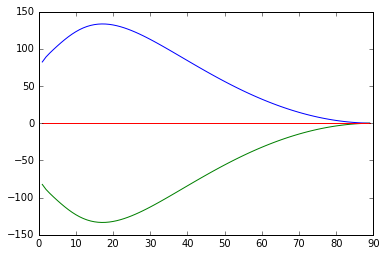

In [10]:
l_deg_p=np.arange(0.0,90.0)
l_deg=np.arange(0.0,90.0)

vt_p = galpy.potential.vterm(MWPotential2014,l_deg_p) * 220.0

l_deg_n=np.arange(0.0,-90.0,-1.0)
vt_n = galpy.potential.vterm(MWPotential2014,l_deg_n) * 220.0

vdiff = vt_p-abs(vt_n)

pylab.plot(l_deg,vt_p)
pylab.plot(l_deg,vt_n)
pylab.plot(l_deg,vdiff)

print vdiff



## Set up a bar potential

In [23]:
#print [p for p in dir(galpy.potential) if 'Potential' in p]

from galpy.potential import SteadyLogSpiralPotential, \
    LogarithmicHaloPotential, TransientLogSpiralPotential, \
    DehnenBarPotential, PowerSphericalPotential, \
    MovingObjectPotential, lindbladR, EllipticalDiskPotential
from galpy.df_src.evolveddiskdf import evolveddiskdf
from galpy.util import save_pickles, bovy_plot, bovy_coords, multi
from galpy.orbit import Orbit
from galpy.df import dehnendf, shudf

from galpy.util import config

baralpha=0.01  #Bar strength alpha parameter
bar_tform=-4.  # Time for Bar to form in bar periouds
bar_tsteady=2.0  # Bar steady time in bar periods
beta=0.0 # Rotation curve power law index
bar_olr=.9  # Radius of OLR
bar_angle=25.0 # Bar angle
config_setro=8.
axip= LogarithmicHaloPotential(normalize=1.,q=0.95)  # Set up first potential
pot= [axip]
barp= DehnenBarPotential(alpha=baralpha,
                                 tform=bar_tform,
                                 tsteady=bar_tsteady,
                                 beta=beta,
                                 rolr=bar_olr,
                                 barphi=bar_angle/180.*np.pi,
                                 ro=8.0,
                                 vo=220.)
# Add Bar

pot.append(barp)
to= barp.tform()


# Evolve the Disk.  

[0.97044564147505419, 0.87827105589310739, 0.79485148081087953, 0.71935521754479992, 0.65102971127233433, 0.58919386821010666, 0.5332312940536027, 0.48258413531826094, 0.43674752410164008, 0.39526454691959295, 0.35772168898774598, 0.32374471172098868, 0.29299492214240935, 0.2651657967642862, 0.23997992615987301, 0.21718624974895379, 0.19655755309349612, 0.17788820293756635, 0.16099209741849435, 0.14570081095466145, 0.13186191529645303, 0.11933746005735249, 0.10800259758538314, 0.09774433845410832, 0.088460425157882952, 0.080058312772974274, 0.072454246435636679, 0.065572426453987323, 0.059344252715693831, 0.053707640857100343, 0.048606403387480457, 0.043989689595003705, 0.039811478648926764, 0.03603012084912597, 0.032607922450388606, 0.029510769919914037, 0.026707789882168226, 0.024171041363804251, 0.021875237269928433, 0.019797492314341129, 0.017917094891612223, 0.016215300617678216, 0.014675145480222586, 0.013281276735979518, 0.012019799869772861, 0.010878140089740794, 0.009844916977

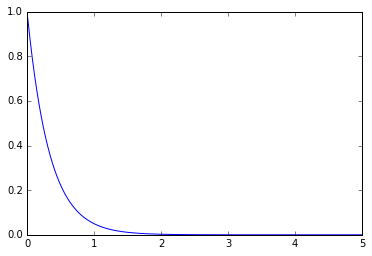

In [19]:
rd=1./3.
rs=2.0
so = 31.4/220.
dfc= dehnendf(beta=beta,correct=True,niter=20,profileParams=(rd,rs,so),savedir='./')

edf= evolveddiskdf(dfc,pot,to=to)

#vt_n = galpy.potential.vterm(EllipticalDiskPotential,l_deg_n) * 220.0

# Plot the surfacemass for the distribution function
Rs= np.linspace(0.01,5.,151)
out= [dfc.surfacemass(r) for r in Rs]
pylab.plot(Rs, out)

### Setup the grid 

In [ ]:

xgrid= np.linspace(0.,2.*math.pi*(1.-1./26./2.),
                                   2.*26.)
ygrid= np.linspace(0.1,2.0,26.)

nx= len(xgrid)
ny= len(ygrid)
print nx,ny
ii, jj= 0, 0
nt=1
surfmass= np.zeros((nx,ny,1))
meanvr= np.zeros((nx,ny,1))
meanvt= np.zeros((nx,ny,1))
grids= []
evalts= np.linspace(0.,to,nt)
nsigma=1
R, phi= ygrid[jj], xgrid[ii]
while  ii < nx:
    #Calculate surfmass etc.
    while jj < ny:
        smass, grid= edf.vmomentsurfacemass(R,0,0,grid=True,phi=phi,
                                        returnGrid=True,t=evalts,
                                        gridpoints=26,
                                        nsigma=nsigma,
                                        print_progress=True)
        surfmass= smass
        meanvr= edf.meanvR(R,phi=phi,grid=grid,t=evalts,
                       surfacemass=surfmass,
                       nsigma=nsigma)
        meanvt= edf.meanvT(R,phi=phi,grid=grid,t=evalts,
                       surfacemass=surfmass,
                       nsigma=nsigma)


52 26
Velocity gridpoint 651 out of 676
Velocity gridpoint 651 out of 676
Velocity gridpoint 651 out of 676
Velocity gridpoint 651 out of 676
Velocity gridpoint 651 out of 676
Velocity gridpoint 651 out of 676
Velocity gridpoint 651 out of 676
Velocity gridpoint 651 out of 676
Velocity gridpoint 651 out of 676
Velocity gridpoint 651 out of 676
Velocity gridpoint 651 out of 676
Velocity gridpoint 651 out of 676
Velocity gridpoint 651 out of 676
Velocity gridpoint 651 out of 676
Velocity gridpoint 651 out of 676
Velocity gridpoint 651 out of 676
Velocity gridpoint 651 out of 676
Velocity gridpoint 651 out of 676
Velocity gridpoint 651 out of 676
Velocity gridpoint 651 out of 676
Velocity gridpoint 651 out of 676
Velocity gridpoint 651 out of 676
Velocity gridpoint 651 out of 676
Velocity gridpoint 651 out of 676
Velocity gridpoint 651 out of 676
Velocity gridpoint 651 out of 676
Velocity gridpoint 651 out of 676
Velocity gridpoint 651 out of 676
Velocity gridpoint 651 out of 676
Velocity

ValueError: I/O operation on closed file

In [28]:
meanvt.shape()

TypeError: 'tuple' object is not callable

In [21]:
l_deg_p=np.arange(0.0,90.0)
l_deg=np.arange(0.0,90.0)

vt_p = galpy.potential.vterm(pot,l_deg_p) * 220.0

l_deg_n=np.arange(0.0,-90.0,-1.0)
vt_n = galpy.potential.vterm(pot,l_deg_n) * 220.0

vdiff = vt_p-abs(vt_n)

pylab.plot(l_deg,vt_p)
pylab.plot(l_deg,vt_n)
pylab.plot(l_deg,vdiff)

print vdiff



PotentialError: 'The (list of) planarPotential instances is non-axisymmetric, but you did not provide phi'